In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

OBJECTIVE: The goal is to correctly predict rain above 1 mm for tomorrow.

#### READ DATA

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.head()

<ipython-input-2-e4ff7723f89b>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("weatherAUS.csv")


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,No


#### DATA CHECKING

In [3]:
df.shape

(145460, 23)

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  object 
 17  Cloud9am       89572 non-null

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
for col in df.columns:
    msg = "Column : {:>10}\t persen of NaN value : {:2f}%".format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

Column :       Date	 persen of NaN value : 0.000000%
Column :   Location	 persen of NaN value : 0.000000%
Column :    MinTemp	 persen of NaN value : 1.020899%
Column :    MaxTemp	 persen of NaN value : 0.866905%
Column :   Rainfall	 persen of NaN value : 2.241853%
Column : Evaporation	 persen of NaN value : 43.166506%
Column :   Sunshine	 persen of NaN value : 48.009762%
Column : WindGustDir	 persen of NaN value : 7.098859%
Column : WindGustSpeed	 persen of NaN value : 7.055548%
Column : WindDir9am	 persen of NaN value : 7.263853%
Column : WindDir3pm	 persen of NaN value : 2.906641%
Column : WindSpeed9am	 persen of NaN value : 1.214767%
Column : WindSpeed3pm	 persen of NaN value : 2.105046%
Column : Humidity9am	 persen of NaN value : 1.824557%
Column : Humidity3pm	 persen of NaN value : 3.098446%
Column : Pressure9am	 persen of NaN value : 10.356799%
Column : Pressure3pm	 persen of NaN value : 10.331363%
Column :   Cloud9am	 persen of NaN value : 38.421559%
Column :   Cloud3pm	 persen 

In [9]:
cat_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

for column in cat_columns:
    df.loc[df[column].isnull(), column] = str(df[column].mode())

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [11]:
df.loc[df['RainTomorrow'] == 'No', 'Target'] = 0
df.loc[df['RainTomorrow'] == 'Yes', 'Target'] = 1

#### FEATURE ENGINEERING


##### CATEGORICAL PROCESS

In [12]:
city_data = df.pivot_table(index='Location',
                                values=['WindGustSpeed', 'WindSpeed9am', 'Humidity9am', 'Temp9am'],
                                aggfunc=[np.mean, np.median, np.max])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Target
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0.0


In [13]:
city_mean = city_data['mean'].reset_index()
city_median = city_data['median'].reset_index()
city_amax = city_data['amax'].reset_index()

In [14]:
temp_name = []
for column in city_mean.columns:
    if column == 'Location':
        temp_name.append(column)
    else:
        name = 'mean' + '_' + column
        temp_name.append(name)

city_mean.columns = temp_name

In [15]:
temp_name = []
for column in city_median.columns:
    if column == 'Location':
        temp_name.append(column)
    else:
        name = 'median' + '_' + column
        temp_name.append(name)

city_median.columns = temp_name

In [16]:
temp_name = []
for column in city_amax.columns:
    if column == 'Location':
        temp_name.append(column)
    else:
        name = 'max' + '_' + column
        temp_name.append(name)

city_amax.columns = temp_name

In [17]:
city_amax.head()

,Location,max_Humidity9am,max_Temp9am,max_WindGustSpeed,max_WindSpeed9am
0,Adelaide,100.0,38.6,85.0,39.0
1,Albany,100.0,33.5,NaN,65.0
2,Albury,100.0,34.5,107.0,37.0
3,AliceSprings,100.0,39.1,96.0,41.0
4,BadgerysCreek,100.0,37.6,102.0,48.0


In [18]:
city_data = pd.merge(city_mean, city_median, how="left", on="Location")
city_data = pd.merge(city_data, city_amax, how="left", on="Location")
city_data.head()

,Location,mean_Humidity9am,mean_Temp9am,mean_WindGustSpeed,mean_WindSpeed9am,median_Humidity9am,median_Temp9am,median_WindGustSpeed,median_WindSpeed9am,max_Humidity9am,max_Temp9am,max_WindGustSpeed,max_WindSpeed9am
0,Adelaide,59.701066,16.929046,36.499211,9.950125,60.0,16.1,35.0,9.0,100.0,38.6,85.0,39.0
1,Albany,74.805416,16.236455,NaN,12.503189,75.0,16.4,NaN,9.0,100.0,33.5,NaN,65.0
2,Albury,74.070604,14.361135,32.977394,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0
3,AliceSprings,39.690155,21.335658,40.531281,14.727452,36.0,21.9,39.0,15.0,100.0,39.1,96.0,41.0
4,BadgerysCreek,76.895770,16.571698,33.600409,8.051351,77.0,16.9,31.0,7.0,100.0,37.6,102.0,48.0


In [19]:
df = pd.merge(df, city_data, how="left", on="Location")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,mean_WindGustSpeed,mean_WindSpeed9am,median_Humidity9am,median_Temp9am,median_WindGustSpeed,median_WindSpeed9am,max_Humidity9am,max_Temp9am,max_WindGustSpeed,max_WindSpeed9am
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,32.977394,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,32.977394,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,32.977394,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,32.977394,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,32.977394,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0


In [20]:

# Check data types of the columns
print(df[['Pressure9am', 'Pressure3pm']].dtypes)

# Convert columns to numeric if they contain numeric data represented as strings
df['Pressure9am'] = pd.to_numeric(df['Pressure9am'], errors='coerce')
df['Pressure3pm'] = pd.to_numeric(df['Pressure3pm'], errors='coerce')

# Calculate the average pressure
df['Pressure'] = (df['Pressure9am'] + df['Pressure3pm']) / 2

# Check if there are any NaN values in the 'Pressure' column after calculation
print(df['Pressure'].isnull().sum())

# Optionally, handle NaN values if present
# For example, fill NaN values with the mean of the 'Pressure' column
df['Pressure'].fillna(df['Pressure'].mean(), inplace=True)


Pressure9am    float64
Pressure3pm     object
dtype: object
15291


In [21]:
df['Pressure'] = (df['Pressure9am'] + df['Pressure3pm']) / 2

In [22]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,mean_WindSpeed9am,median_Humidity9am,median_Temp9am,median_WindGustSpeed,median_WindSpeed9am,max_Humidity9am,max_Temp9am,max_WindGustSpeed,max_WindSpeed9am,Pressure
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0,1007.40
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0,1009.20
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0,1008.15
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0,1015.20
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,8.211151,76.0,14.1,31.0,7.0,100.0,34.5,107.0,37.0,1008.40


#### TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split

df = df.dropna()

X = df.drop(['Date',  'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Target'], axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [24]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,mean_WindSpeed9am,median_Humidity9am,median_Temp9am,median_WindGustSpeed,median_WindSpeed9am,max_Humidity9am,max_Temp9am,max_WindGustSpeed,max_WindSpeed9am,Pressure
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,14.655749,54.0,18.1,35.0,15.0,100.0,37.7,100.0,35.0,1005.35
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,14.655749,54.0,18.1,35.0,15.0,100.0,37.7,100.0,35.0,1012.50
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,14.655749,54.0,18.1,35.0,15.0,100.0,37.7,100.0,35.0,1010.75
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,14.655749,54.0,18.1,35.0,15.0,100.0,37.7,100.0,35.0,1010.90
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,14.655749,54.0,18.1,35.0,15.0,100.0,37.7,100.0,35.0,1009.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,15.009088,71.0,27.8,39.0,15.0,99.0,32.2,126.0,63.0,1012.20
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,15.009088,71.0,27.8,39.0,15.0,99.0,32.2,126.0,63.0,1012.90
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,15.009088,71.0,27.8,39.0,15.0,99.0,32.2,126.0,63.0,1013.55
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,15.009088,71.0,27.8,39.0,15.0,99.0,32.2,126.0,63.0,1012.80


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,mean_WindSpeed9am,median_Humidity9am,median_Temp9am,median_WindGustSpeed,median_WindSpeed9am,max_Humidity9am,max_Temp9am,max_WindGustSpeed,max_WindSpeed9am,Pressure
0,0.781975,0.210924,-0.302103,1.617432,0.664439,0.560816,-0.258052,1.568169,-0.982785,-0.333154,...,0.951909,-0.186720,0.139113,1.757803,0.699625,0.513574,0.679531,0.770367,1.570256,-0.374402
1,1.600505,0.999648,-0.302103,0.207196,-0.532384,-0.264998,0.442911,0.982831,0.414814,1.005096,...,0.177109,0.248415,1.729583,-0.467587,0.699625,0.513574,-0.467756,-1.740709,-0.742350,-1.017470
2,1.368846,2.118202,-0.302103,1.698791,-0.239827,1.386629,-0.024398,0.280424,-2.864168,-2.266181,...,-0.300815,0.248415,-0.906675,0.026944,-0.406362,0.513574,0.834570,-0.315504,-0.119725,-0.995548
3,1.013635,-0.319672,-0.302103,0.803834,0.451671,0.710963,1.728010,1.568169,0.146045,0.707707,...,0.951909,-0.186720,0.139113,1.757803,0.699625,0.513574,0.679531,0.770367,1.570256,0.363665
4,-1.519175,-1.294822,-0.287852,-0.958961,-0.346211,-1.240959,-1.776805,-0.773186,1.436136,0.905967,...,-0.300815,0.248415,-0.906675,0.026944,-0.406362,0.513574,0.834570,-0.315504,-0.119725,1.357498


##### IMBALANCE DATASET

In [27]:
pd.Series(y_train).value_counts()

0.0    36360
1.0    10112
Name: Target, dtype: int64

###### SMOTE OVERSAMPLING

In [34]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [36]:
pd.Series(y_over).value_counts()

0.0    36360
1.0    36360
Name: Target, dtype: int64

###### UNDERSAMPLING

In [33]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [35]:
pd.Series(y_under).value_counts()

0.0    10112
1.0    10112
Name: Target, dtype: int64

##### MODELLING PART 1

In [30]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc

In [31]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

###### Prediksi dengan data Undersampling

In [37]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_under, y_under)

lr_pred = model_lr.predict(X_test)

eval_classification(model_lr,lr_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8070
Precision (Test Set): 0.5491
Recall (Test Set): 0.8009
F1-Score (Test Set): 0.6515
AUC: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Prediksi dengan data Oversampling

In [38]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_over, y_over)

lr_pred = model_lr.predict(X_test)

eval_classification(model_lr,lr_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.8075
Precision (Test Set): 0.5499
Recall (Test Set): 0.7998
F1-Score (Test Set): 0.6517
AUC: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Data resampling terbaik dengan menggunakan metode Undersampling

#### Check Overfitting

In [39]:
# print the scores on training and test set

print('Training set Oversampling score: {:.4f}'.format(model_lr.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(model_lr.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(model_lr.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(model_lr.score(X_test, y_test)))

Training set Oversampling score: 0.8058
Test set Oversampling score: 0.8075
Training set Undersampling score: 0.8046
Test set Undersampling score: 0.8075


### Null accuracy
Digunkana untuk mengetahui performa model kita apakah memliki kecenderungan ke salah satu class atau tidak.

Rumus : Total data dg label terbanyak/ seluruh data

Metriksnya : Null accuracy harus dibawah nilai accuracy

In [40]:
# check null accuracy score
def check_nullAccuracy(total_minLabel,total_maxLabel):
  null_accuracy = (total_maxLabel/(total_minLabel+total_maxLabel))
  print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

In [41]:
y_test.value_counts()

0.0    9001
1.0    2617
Name: Target, dtype: int64

In [42]:
check_nullAccuracy(6247,21911)

Null accuracy score: 0.7781


#### ENSEMBLE LEARNING

1. Boosting : XGBoost, Adaboost
2. Bagging : Random Forest
3. Stacking : Kombinasi dari algoritma lain

1. Boosting (XGBoost)

In [43]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=50)
xg.fit(X_under, y_under)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8125
Precision (Test Set): 0.5566
Recall (Test Set): 0.8246
F1-Score (Test Set): 0.6646
AUC: 0.82


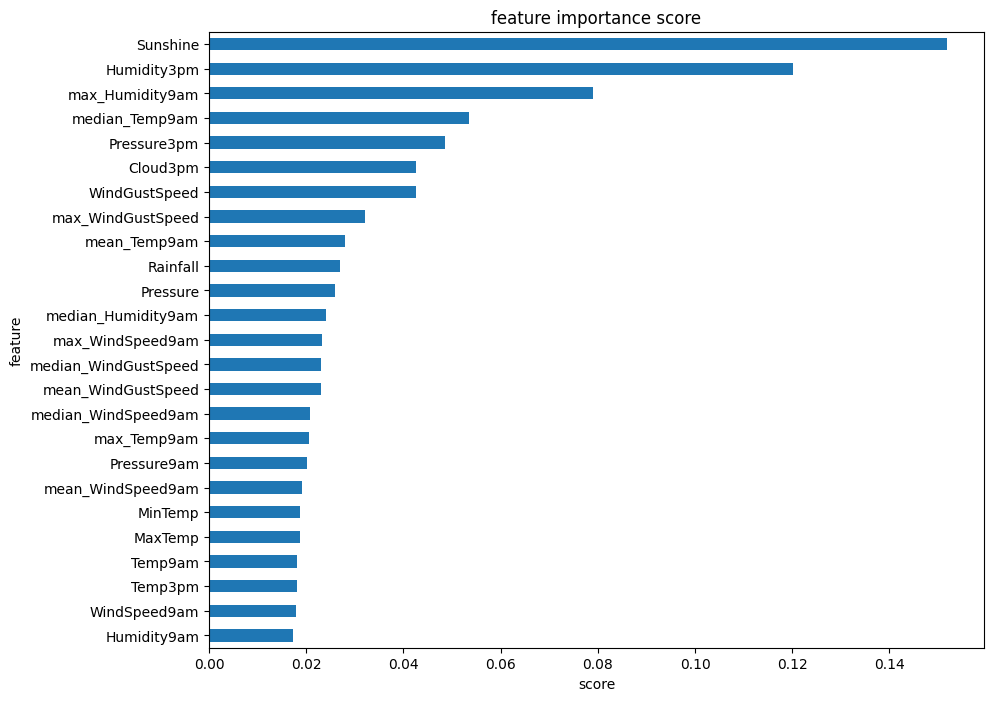

In [44]:
show_feature_importance(xg)

2. Bagging (Random Forest)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over, y_over)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.8491
Precision (Test Set): 0.6592
Recall (Test Set): 0.6836
F1-Score (Test Set): 0.6712
AUC: 0.79


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_under, y_under)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8107
Precision (Test Set): 0.5530
Recall (Test Set): 0.8338
F1-Score (Test Set): 0.6649
AUC: 0.82


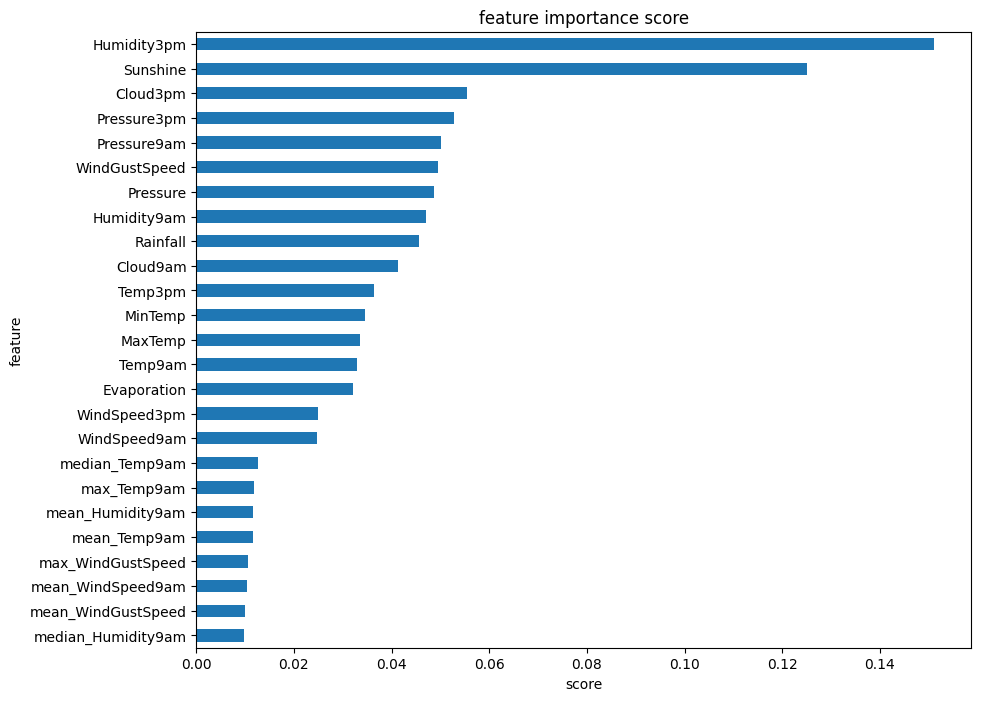

In [47]:
show_feature_importance(rf)

#### MATRIX

In [48]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7237 1764]
 [ 435 2182]]

True Positives(TP) =  7237

True Negatives(TN) =  2182

False Positives(FP) =  1764

False Negatives(FN) =  435


<Axes: >

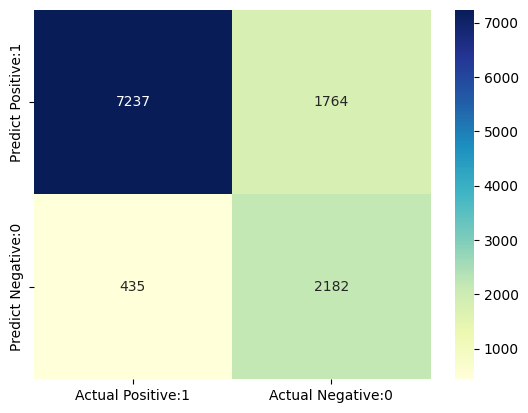

In [49]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87      9001
         1.0       0.55      0.83      0.66      2617

    accuracy                           0.81     11618
   macro avg       0.75      0.82      0.77     11618
weighted avg       0.86      0.81      0.82     11618



In [51]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [52]:
accuracy = (TP+TN) / float(TP+TN+FP+FN)

print('Classification accuracy : {0:0.4f}'.format(accuracy))

Classification accuracy : 0.8107


In [53]:
class_error = (FP+FN) / float(TP+TN+FP+FN)

print('Classification Error : {0:0.4f}'.format(class_error))

Classification Error : 0.1893


In [54]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8040


In [55]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Recall or Sensitivity or TPR : 0.9433


1. TRUE POSITIVE RATE

In [56]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9433


2. FALSE POSITIVE RATE

In [57]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4470


3. SPACIFICITY

In [58]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5530


#### THRESHOLD

In [59]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = rf.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.65, 0.35],
       [0.76, 0.24],
       [0.26, 0.74],
       [0.63, 0.37],
       [0.91, 0.09],
       [0.53, 0.47],
       [0.89, 0.11],
       [0.77, 0.23],
       [0.7 , 0.3 ],
       [0.16, 0.84]])

In [60]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Rain tomorrow (1)', 'Prob of - Rain tomorrow (0)'])

y_pred_prob_df

,Prob of - No Rain tomorrow (1),Prob of - Rain tomorrow (0)
0,0.65,0.35
1,0.76,0.24
2,0.26,0.74
3,0.63,0.37
4,0.91,0.09
5,0.53,0.47
6,0.89,0.11
7,0.77,0.23
8,0.70,0.30
9,0.16,0.84


In [61]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = rf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

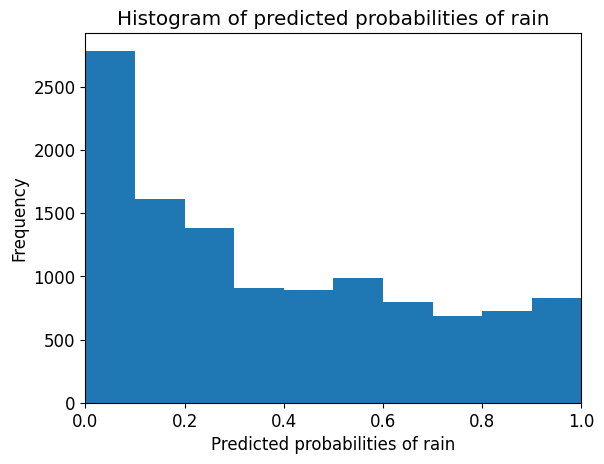

In [62]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [63]:
from sklearn.preprocessing import binarize

for i in range(1,7):

    cm1=0

    y_pred1 = rf.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1,  threshold=i/10)

    # y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    # print(y_test)
    # print(y_pred2)


    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[2959 6042]
 [  11 2606]] 

 with 5565 correct predictions,  

 6042 Type I errors( False Positives),  

 11 Type II errors( False Negatives),  

 Accuracy score:  0.4789981063866414 

 Sensitivity:  0.9957967137944211 

 Specificity:  0.3287412509721142 



With 0.2 threshold the Confusion Matrix is  

 [[4472 4529]
 [  69 2548]] 

 with 7020 correct predictions,  

 4529 Type I errors( False Positives),  

 69 Type II errors( False Negatives),  

 Accuracy score:  0.6042348080564641 

 Sensitivity:  0.9736339319831868 

 Specificity:  0.4968336851460949 



With 0.3 threshold the Confusion Matrix is  

 [[5633 3368]
 [ 152 2465]] 

 with 8098 correct predictions,  

 3368 Type I errors( False Positives),  

 152 Type II errors( False Negatives),  

 Accuracy score:  0.6970218626269582 

 Sensitivity:  0.9419182269774551 

 Specificity:  0.6258193534051772 



With 0.4 threshold the Confusion Matrix is  

 [[6516 2485]
 [ 277 2340]] 

 w

In [64]:

y_pred1 = rf.predict_proba(X_test)[:,1]

y_pred1 = y_pred1.reshape(-1,1)

y_pred2 = binarize(y_pred1, threshold= 0.6)

# predicted_final = np.where(y_pred2 == 1, 'Yes', 'No')

In [65]:
y_pred2[0:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [66]:

y_pred1 = rf.predict_proba(X_test)[:,1]

y_pred1 = y_pred1.reshape(-1,1)

y_pred2 = binarize(y_pred1, threshold= 0.3)

# predicted_final = np.where(y_pred2 == 1, 'Yes', 'No')

In [67]:
y_pred2[0:10]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [68]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7839
